In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import format_axes
import numpy as np
import seaborn as sns

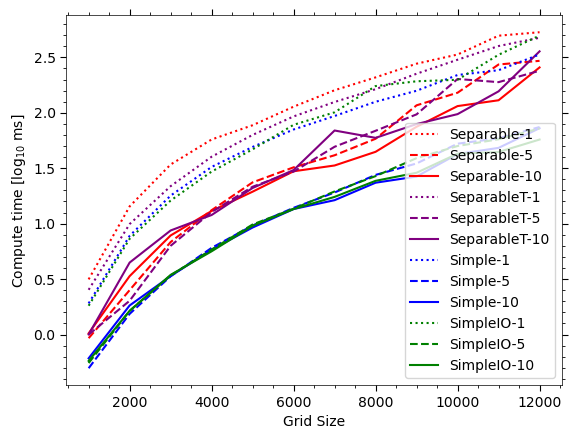

In [2]:
conv_df = pd.read_csv('convolutions.csv')
conv_df = conv_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for method in conv_df['method'].unique():
    for num_threads in conv_df['num_threads'].unique():

        subset = conv_df[(conv_df['method'] == method) & (conv_df['num_threads'] == num_threads)]

        colors = {
            'simple_convolve': 'blue', 
            'separable_convolution': 'red',
            'separable_convolution_T': 'purple',
            'simple_inner_outer': 'green'
        }

        m = {
            'simple_convolve': 'Simple', 
            'separable_convolution': 'Separable',
            'separable_convolution_T': 'SeparableT',
            'simple_inner_outer': 'SimpleIO'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{m[method]}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

# plt.savefig('../../report/figures/convolutions.png', bbox_inches='tight')

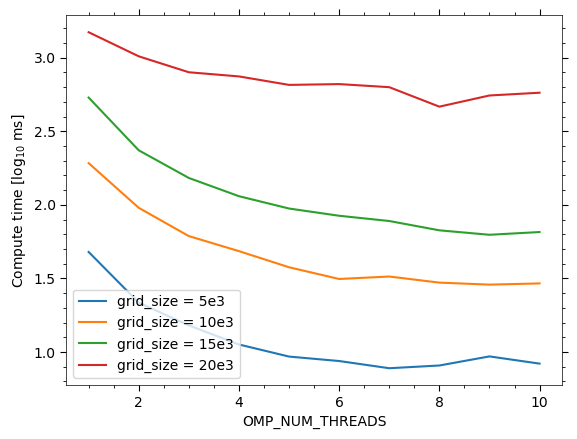

In [6]:
conv_df = pd.read_csv('simpleio_convolution.csv')
conv_df = conv_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for grid_size in conv_df['grid_size'].unique():
    subset = conv_df[(conv_df['grid_size'] == grid_size)]

    plt.plot(subset['num_threads'], subset['duration'], label=rf'grid_size = {int(grid_size/1000)}e3')

plt.xlabel('OMP_NUM_THREADS')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

# plt.savefig('../../report/figures/simpleio.png', bbox_inches='tight')

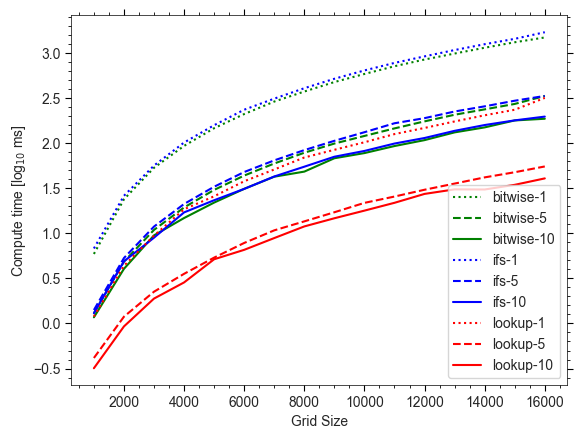

In [6]:
trans_df = pd.read_csv('transitions.csv')
trans_df = trans_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

trans_df['duration'] = np.log10(trans_df['duration'])

for method in trans_df['method'].unique():
    for num_threads in trans_df['num_threads'].unique():

        subset = trans_df[(trans_df['method'] == method) & (trans_df['num_threads'] == num_threads)]

        colors = {
            'ifs': 'blue', 
            'lookup': 'red',
            'bitwise': 'green'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{method}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

# plt.savefig('../../report/figures/transitions.png', bbox_inches='tight')

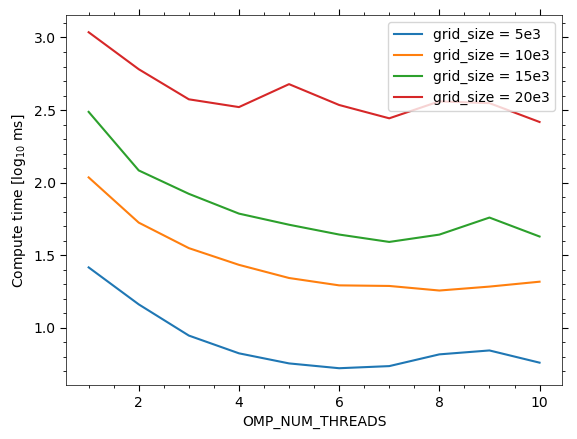

In [7]:
df = pd.read_csv('lookup.csv')
df = df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

df['duration'] = np.log10(df['duration'])

for grid_size in df['grid_size'].unique():
    subset = df[(df['grid_size'] == grid_size)]

    plt.plot(subset['num_threads'], subset['duration'], label=rf'grid_size = {int(grid_size/1000)}e3')

plt.xlabel('OMP_NUM_THREADS')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

# plt.savefig('../../report/figures/lookup.png', bbox_inches='tight')

In [8]:
# df = pd.read_csv('mpi_omp.csv', header=None)
# df.columns = ['ranks', 'threads', 'grid_size', 'generations', 'duration']

# df50 = df[df['grid_size'] == 5000].groupby(['ranks', 'threads', 'grid_size', 'generations']).mean().reset_index()
# df25 = df[df['grid_size'] == 2500].groupby(['ranks', 'threads', 'grid_size', 'generations']).mean().reset_index()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# df50['duration'] = np.log10(df50['duration'])
# df25['duration'] = np.log10(df25['duration'])


# for ranks in df50['ranks'].unique():
#     subset = df50[df50['ranks'] == ranks]
#     ax1.plot(subset['threads'], subset['duration'], label=rf'ranks={ranks}')

# for ranks in df25['ranks'].unique():
#     subset = df25[df25['ranks'] == ranks]
#     ax2.plot(subset['threads'], subset['duration'], label=rf'ranks={ranks}')

# ax1.set_xlabel('OMP_NUM_THREADS')
# ax2.set_xlabel('OMP_NUM_THREADS')
# ax1.set_ylabel('Compute time [log$_{10}$ ms]')
# ax1.legend()
# ax2.legend()
# format_axes(ax1)
# format_axes(ax2)
# plt.tight_layout()

# ax1.set_ylim([2.74, 4.21])
# ax2.set_ylim([2.74, 4.21])

# ax1.text(8, 4.16, r"grid_size = $5 \times 10^{3}$", ha='right', va='top', color='black', fontsize=13)
# ax2.text(8, 4.16, r"grid_size = $2.5 \times 10^{3}$", ha='right', va='top', color='black', fontsize=13)

# # plt.savefig('../../report/figures/mpi_vs_omp_mac.png', bbox_inches='tight')

In [10]:
fig, ax = plt.subplots()
df = pd.read_csv('mpi_hpc.csv')
df = df.groupby(['ranks', 'threads', 'grid_size', 'generations']).mean().reset_index()
df = df.set_index('grid_size')

for grid_size in df.index.unique():
    subset = df.loc[grid_size]
    plt.plot(subset['ranks'], np.log10(subset['duration']), label=rf'grid_size = {float(grid_size/1000)}e3')

plt.xlabel('MPI Ranks')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

# plt.savefig('../../report/figures/mpi_hpc.png', bbox_inches='tight')

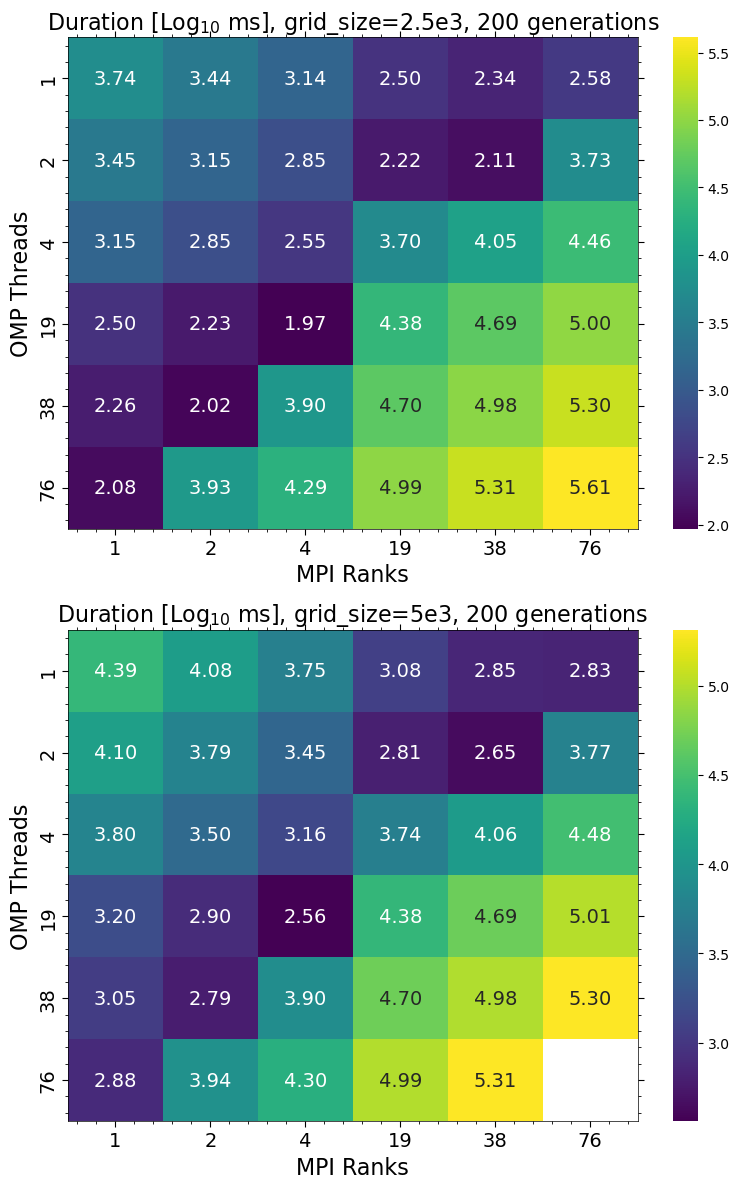

In [15]:
df = pd.read_csv('mpi_vs_omp_hpc.csv')
df = df.groupby(['ranks', 'threads', 'grid_size', 'generations']).mean().reset_index()
df['duration'] = np.log10(df['duration'])
df = df.set_index('grid_size')

fig, ax = plt.subplots(2, 1, figsize=(8, 12))

# Splitting the dataframe by grid_size for the plots
df_2500 = df.loc[2500].reset_index()
df_5000 = df.loc[5000].reset_index()


# Pivot tables for log10(duration)
pivot_log_2500 = df_2500.pivot_table(values='duration', index='threads', columns='ranks')
pivot_log_5000 = df_5000.pivot_table(values='duration', index='threads', columns='ranks')

# Heatmap for 2500 grid size with log10(duration)
sns.heatmap(pivot_log_2500, cmap='viridis', annot=True, fmt=".2f", ax=ax[0], annot_kws={'size': 14})
ax[0].set_title(r'Duration [Log$_{10}$ ms], grid_size=2.5e3, 200 generations', fontsize=16)

# Heatmap for 5000 grid size with log10(duration)
sns.heatmap(pivot_log_5000, cmap='viridis', annot=True, fmt=".2f", ax=ax[1], annot_kws={'size': 14})
ax[1].set_title(r'Duration [Log$_{10}$ ms], grid_size=5e3, 200 generations', fontsize=16)

[format_axes(axes) for axes in ax]
[axes.set_xlabel('MPI Ranks', fontsize=16) for axes in ax]
[axes.set_ylabel('OMP Threads', fontsize=16) for axes in ax]
[axes.tick_params(axis='both', which='major', labelsize=14) for axes in ax]

plt.tight_layout()
# plt.savefig('../../report/figures/mpi_vs_omp_hpc.png', bbox_inches='tight')